## EDA and ルールベース

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

DIR = "/content/drive/MyDrive/Competitions/probspace/研究論文の国際学会採択予測"
INPUT_DIR = os.path.join(DIR,"input")
OUTPUT_DIR = os.path.join(DIR,"output")

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [3]:
class CFG:
  ver=1
  seed=""
  model="rule_base"

In [4]:
import pandas as pd

train = pd.read_csv(os.path.join(INPUT_DIR,"train_data.csv"))
test = pd.read_csv(os.path.join(INPUT_DIR,"test_data.csv"))
sample_sub = pd.read_csv(os.path.join(INPUT_DIR,"submission.csv"))

print(train.shape)
display(train.head(3))

print(test.shape)
display(test.head(3))

print(sample_sub.shape)
display(sample_sub.head(3))

(4974, 6)


,id,title,year,abstract,keywords,y
0,1,Hierarchical Adversarially Learned Inference,2018,We propose a novel hierarchical generative mod...,"generative, hierarchical, unsupervised, semisu...",0
1,2,Learning to Compute Word Embeddings On the Fly,2018,Words in natural language follow a Zipfian dis...,"NLU, word embeddings, representation learning",0
2,3,Graph2Seq: Scalable Learning Dynamics for Graphs,2018,Neural networks are increasingly used as a gen...,NaN,0


(6393, 5)


,id,title,year,abstract,keywords
0,1,StyleAlign: Analysis and Applications of Align...,2022,"In this paper, we perform an in-depth study of...","StyleGAN, transfer learning, fine tuning, mode..."
1,2,Embedding a random graph via GNN: mean-field i...,2021,We develop a theory for embedding a random gra...,"Graph neural network, graph embedding, multi-r..."
2,3,BBRefinement: an universal scheme to improve p...,2021,We present a conceptually simple yet powerful ...,"object detection, deep neural networks, refine..."


(6393, 2)


,id,y
0,1,0
1,2,0
2,3,0


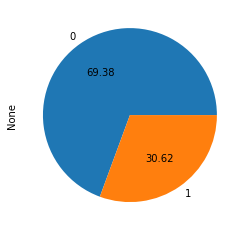

In [5]:
train.groupby("y").size().plot(kind="pie",autopct='%.2f')

y = 0 タイトル文字数最大 : 165
y = 0 タイトル文字数最小 9
y = 0 タイトル文字数平均 : 64.58794552303681

y = 1 タイトル文字数最大 : 132
y = 1 タイトル文字数最小 8
y = 1 タイトル文字数平均 : 63.55745239658569



/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25991 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23383 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25991 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 23383 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text

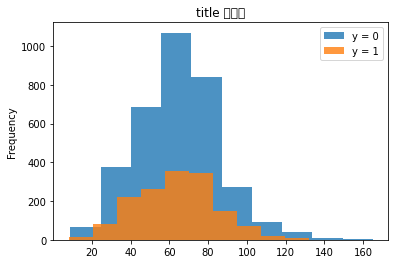

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(2):
  print("y = {} タイトル文字数最大 : {}".format(i, train.loc[train["y"]==i]["title"].str.len().max()))
  print("y = {} タイトル文字数最小 {}".format(i, train.loc[train["y"]==i]["title"].str.len().min()))
  print("y = {} タイトル文字数平均 : {}".format(i, train.loc[train["y"]==i]["title"].str.len().mean()))
  print()

train.loc[train["y"]==0]["title"].str.len().plot(kind="hist", alpha=.8, label="y = 0")
train.loc[train["y"]==1]["title"].str.len().plot(kind="hist", alpha=.8, label="y = 1")
plt.title(f"title 文字数")
plt.legend()
plt.show()

y = 0 アブスト文字数最大 : 2777
y = 0 アブスト文字数最小 9
y = 0 アブスト文字数平均 : 1120.8461315560708

y = 1 アブスト文字数最大 : 2221
y = 1 アブスト文字数最小 228
y = 1 アブスト文字数平均 : 1138.3644123440579



/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25991 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23383 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25991 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 23383 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text

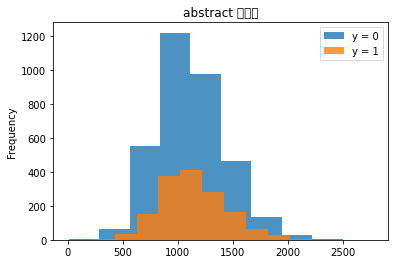

In [7]:
for i in range(2):
  print("y = {} アブスト文字数最大 : {}".format(i, train.loc[train["y"]==i]["abstract"].str.len().max()))
  print("y = {} アブスト文字数最小 {}".format(i, train.loc[train["y"]==i]["abstract"].str.len().min()))
  print("y = {} アブスト文字数平均 : {}".format(i, train.loc[train["y"]==i]["abstract"].str.len().mean()))
  print()

train.loc[train["y"]==0]["abstract"].str.len().plot(kind="hist", alpha=.8, label="y = 0")
train.loc[train["y"]==1]["abstract"].str.len().plot(kind="hist", alpha=.8, label="y = 1")
plt.title(f"abstract 文字数")
plt.legend()
plt.show()

y = 0 キーワード数最大 : 15
y = 0 キーワード数最小 0
y = 0 キーワード数平均 : 3.460156476383657

y = 1 キーワード数最大 : 21
y = 1 キーワード数最小 0
y = 1 キーワード数平均 : 3.7196323046618516



/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12461 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12527 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12489 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12461 missing from current font.
  font.set_

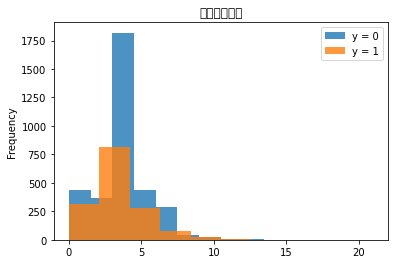

In [8]:
train["kyewords_count"] = train.keywords.str.split(',').apply(pd.Series).count(axis=1)
test["kyewords_count"] = test.keywords.str.split(',').apply(pd.Series).count(axis=1)

for i in range(2):
  print("y = {} キーワード数最大 : {}".format(i, train.loc[train["y"]==i]["kyewords_count"].max()))
  print("y = {} キーワード数最小 {}".format(i, train.loc[train["y"]==i]["kyewords_count"].min()))
  print("y = {} キーワード数平均 : {}".format(i, train.loc[train["y"]==i]["kyewords_count"].mean()))
  print()

train.loc[train["y"]==0]["kyewords_count"].plot(kind="hist", alpha=.8, label="y = 0")
train.loc[train["y"]==1]["kyewords_count"].plot(kind="hist", alpha=.8, label="y = 1")
plt.title(f"キーワード数")
plt.legend()
plt.show()

In [9]:
import spacy 

nlp = spacy.load("en_core_web_sm")

train["title_nlp"] = train["title"].apply(lambda text : nlp(text))
train["abstract_nlp"] = train["abstract"].apply(lambda text : nlp(text))
test["title_nlp"] = test["title"].apply(lambda text : nlp(text))
test["abstract_nlp"] = test["abstract"].apply(lambda text : nlp(text))

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [10]:
from collections import Counter
from tqdm.auto import tqdm

def count_freq_word(df, col="title"):
  counter = Counter()

  for text in tqdm(df[df["y"]==1][f"{col}_nlp"]):
    counter.update([str(t) for t in text if ((t.pos_ == "NOUN")|(t.pos_=="ADJ"))&(len(t)>1)])

  freq_df = pd.DataFrame(counter.most_common(n=50),columns=[f"{col}_freqword",f"{col}_count"])

  return freq_df

In [11]:
freq_title = count_freq_word(train)
freq_abst = count_freq_word(train,"abstract")

  0%|          | 0/1523 [00:00<?, ?it/s]

  0%|          | 0/1523 [00:00<?, ?it/s]

In [12]:
title_mean = freq_title.title_count.mean()
title_std = freq_title.title_count.std()
title_thresh = title_mean - title_std*0
title_list = freq_title.loc[freq_title.title_count>title_thresh]["title_freqword"].tolist()

abst_mean = freq_abst.abstract_count.mean()
abst_std = freq_abst.abstract_count.std()
abst_thresh = abst_mean - abst_std*0
abst_list = freq_abst.loc[freq_abst.abstract_count>abst_thresh]["abstract_freqword"].tolist()

In [13]:
len(title_list), len(abst_list)

(12, 17)

In [14]:
def has_title_freq_words(text):
    for key_word in title_list:
        if key_word in text:
            return True
    return False

def has_abst_freq_words(text):
    for key_word in abst_list:
        if key_word in text:
            return True
    return False

In [15]:
train["y_title"] = train["title"].map(has_title_freq_words)
train["y_abst"] = train["abstract"].map(has_abst_freq_words)

test["y_title"] = test["title"].map(has_title_freq_words)
test["y_abst"] = test["abstract"].map(has_abst_freq_words)

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

score = accuracy_score(train["y"], train["y_title"])
print("Accuracy : ",score)
print()
print(classification_report(train["y"],train["y_title"]))

Accuracy :  0.5255327704061118

              precision    recall  f1-score   support

           0       0.71      0.54      0.61      3451
           1       0.32      0.49      0.39      1523

    accuracy                           0.53      4974
   macro avg       0.51      0.52      0.50      4974
weighted avg       0.59      0.53      0.54      4974



In [17]:
sample_sub["y"] = test["y_title"]
sample_sub["y"] = sample_sub["y"].apply(lambda x: 1 if x==True else 0)
sample_sub.to_csv(os.path.join(OUTPUT_DIR, f'submit_{CFG.model}_seed{CFG.seed}_ver{CFG.ver}.csv'))
display(sample_sub)

,id,y
0,1,0
1,2,0
2,3,0
3,4,1
4,5,1
...,...,...
6388,6389,1
6389,6390,0
6390,6391,0
6391,6392,0


In [18]:
sample_sub.y.value_counts()

0    3407
1    2986
Name: y, dtype: int64